Logistic Regression will be used for Classification/prediction<br>
We need to use Categorical Data<br>
3 Types of Logistic Regression are there-Binomial,Multinomial and Ordinal<br>
Binomial-True or False ,0 or 1<br>
Multinomial- Multiple Categories-cat,dog,sheep<br>
Ordinal-  Independent and Dependent Variable High,Low ,Medium

Implementing Binomial Logistic Regression<br>
To read CSV file

In [10]:
import pandas as pd
# For importing algorithm
from sklearn.linear_model import LogisticRegression
# For splitting between training and testing
from sklearn.model_selection import train_test_split
# Importing accuracy score and mean_squared_error
from sklearn.metrics import mean_squared_error, accuracy_score,mean_absolute_error
# For plotting
import matplotlib.pyplot as plt
# For dimension reduction
from sklearn.decomposition import PCA

Reading csv file<br>
Data Gathering<br>
When we have a lot of data(Bigger dataset) processing takes time<br>
If we run the data in loop for 4 times it will take a lot of time to load<br>
We can use nrows(Parameter for number of rows) to select required number of rows as the dataset is very big

In [11]:
data=pd.read_csv("creditcard.csv",nrows=150000)
print("Dataset is:\n",data)
print("\nColumns of dataset are:\n",data.columns)
print("\nInformation of dataset is::\n",data.info)

Dataset is:
          Time        V1        V2        V3        V4        V5        V6  \
0           0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1           0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2           1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3           1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4           2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...       ...       ...       ...       ...       ...       ...       ...   
149995  92345  1.724254  0.054124  0.625215  4.308400 -0.532295  0.540379   
149996  92346 -3.538487  2.921360 -1.298732 -1.035773 -0.030572 -0.441956   
149997  92347 -0.019481  1.224302 -0.132075 -0.678606  1.768679 -0.283992   
149998  92348 -0.511063  1.277683 -0.174698 -0.101018  0.970555 -1.040956   
149999  92348  2.197093 -0.429996 -1.439194 -0.307975 -0.020266 -0.715370   

              V7        V8        V9  ...       V21       V22 

Handling missing data<br>
We have to drop the data<br>
If we have smaller dataset ,we take mean of that column and update missing value with that<br>
Using this we can avoid outliers

Separating as input and output

In [12]:
X,Y=data.drop(['Class'],axis=1),data['Class']
print("Input is:\n",X,"\nOutput is:\n",Y)
print("\nShape of Input data is:",X.shape,"Shape of Output data is:",Y.shape)

Input is:
          Time        V1        V2        V3        V4        V5        V6  \
0           0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1           0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2           1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3           1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4           2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...       ...       ...       ...       ...       ...       ...       ...   
149995  92345  1.724254  0.054124  0.625215  4.308400 -0.532295  0.540379   
149996  92346 -3.538487  2.921360 -1.298732 -1.035773 -0.030572 -0.441956   
149997  92347 -0.019481  1.224302 -0.132075 -0.678606  1.768679 -0.283992   
149998  92348 -0.511063  1.277683 -0.174698 -0.101018  0.970555 -1.040956   
149999  92348  2.197093 -0.429996 -1.439194 -0.307975 -0.020266 -0.715370   

              V7        V8        V9  ...       V20       V21   

Splitting as training and testing data

In [13]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.7)
print("Training data is:\n",x_train,"\nTesting data is:\n",y_test)
print("Shape of Training data is:",x_train.shape,"shape of Testing Data is:",y_test.shape)

Training data is:
          Time        V1        V2        V3        V4        V5        V6  \
71789   54443  0.872816 -0.529905 -0.401325  0.062774 -0.263370 -0.791265   
105324  69468  0.885606 -0.587944  1.384818  1.756505 -1.072110  0.763968   
53136   45829  1.207089 -0.438641  0.762859  0.409962 -0.934716 -0.023117   
55587   47021 -0.354134  0.609726  2.340085  0.755874 -0.537448 -0.101369   
106335  69927 -2.161465  0.731561  1.142183  2.830884 -0.334402  1.466455   
...       ...       ...       ...       ...       ...       ...       ...   
130599  79389  1.258454  0.401051  0.319707  0.686937 -0.317124 -1.059343   
68891   53181  1.292122 -0.026513 -0.330078 -0.174160  0.222915 -0.175406   
48904   43830 -0.430779  1.507154  1.421488  2.218152  0.658670 -0.609666   
123983  77139 -1.418896  1.720858  0.936665  0.069946 -0.744892 -0.836783   
112292  72598 -0.365316  0.750502  1.062237  0.405442 -0.030072 -0.565215   

              V7        V8        V9  ...       V20     

Taking Algorithm<br>
Since the dataset is very large it is showing maximum number of iterations reached<br>
To avoid this we set max_iter parameter to our requirement

In [14]:
log_reg=LogisticRegression(max_iter=150000)
# Training Algorithm
log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=150000)

Evaluating model

In [15]:
pred=log_reg.predict(x_test)
print("Predicted Values are:\n",pred)
print("\nLength of Predicted values is:",len(pred))
print("\nTraining Accuracy score is:",log_reg.score(x_train,y_train)*100)
# Very good accuracy and also not overfitted
print("\nTesting Accuracy score is:",accuracy_score(y_test,pred)*100)

Predicted Values are:
 [0 0 0 ... 0 0 0]

Length of Predicted values is: 45000

Training Accuracy score is: 99.88

Testing Accuracy score is: 99.88222222222221


Seeing the count of 0 and 1<br>
We do not need to focus on this

In [16]:
print("Count of 0 or not fraud cases in dataset is:",list(Y).count(0))
# This is our main focus
print("Count of 1 or fraud cases in dataset is:",list(Y).count(1))

Count of 0 or not fraud cases in dataset is: 149707
Count of 1 or fraud cases in dataset is: 293


We have many parameters to decide fraud data<br>
More Information about dataset

Doing PCA for dimension reduction

In [17]:
pca=PCA(2)
x=pca.fit(x_test).transform(x_test)
print("Transformed Data is:\n",x)
print("\nShape of Transformed data is:",x.shape)

Transformed Data is:
 [[-21953.73724372    -77.69441972]
 [ 20959.26515617    -73.95829183]
 [-23303.65149249    253.52247334]
 ...
 [ 14307.26326619    -80.45367468]
 [-16254.73773411    -80.30874721]
 [ 51118.38589513    388.22524809]]

Shape of Transformed data is: (45000, 2)


Plotting dataset

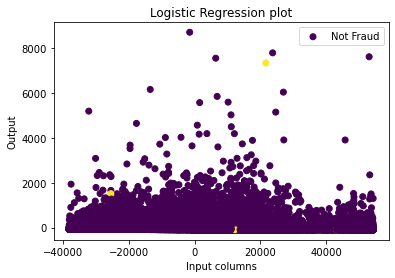

In [18]:
plt.scatter(x[:,0],x[:,1],c=pred)
plt.legend(['Not Fraud'])
plt.xlabel("Input columns")
plt.ylabel("Output")
plt.title("Logistic Regression plot")
plt.show()